# An Exploratory Analysis of Covid Vaccination Hesitancy

## Introduction
Regardless of the reasons or motivations, many Americans are reluctant to receive a vaccination for Covid. I would like to ignore the reasons and motivations entirely, and instead see what the similarities and differences exist among communities that are more and less hesitant to receive a Covid vaccination. Additionally, I hope to explore what effect a community's hesitancy towards vaccination played on the prevalence of Covid cases and deaths from Covid within that community throughout the course of the pandemic.

If you're not interested in following along and interpreting the results of the statistical tests I'll be performing, then feel free to skip to the Conclusion below for the TL;DR version, which gives an intuitive summary of our results. Otherwise we'll begin by discussing our data sources.

## Data Acquisition and Analysis

### Data Acquisition

Our original dataset is found [here](https://aspe.hhs.gov/reports/vaccine-hesitancy-covid-19-state-county-local-estimates) and is the result a Household Pulse Survey given from May 26 to June 7, 2021. The dataset contains county-level estimates of the percentage of the population that are at least somewhat hesitant to be vaccinated for Covid, strongly hesitant to be vaccincated for Covid, or either hesitant or unsure about whether they would or would not receive vaccination. Additionally, the dataset contains county level racial distribution data. Note that we create additional statistics by infering the percentage of the population that is only unsure about vaccination and the percentage of a county that belongs to a racial minority, using a list of American racial minorities found [here](https://minorityrights.org/country/united-states-of-america/). 

We supplement this dataset with two more data sources to help broaden the depth of our investigation. The first is a [dataset](https://github.com/CSSEGISandData/COVID-19) provided by John Hopkin's University which contains the cummulative number of Covid cases and the number of deaths attributed to Covid by county, which we have taken samples of from key periods during the pandemic. The second is a [dataset](https://www.ers.usda.gov/data-products/county-level-data-sets/download-data/) from the US Department of Agriculture, Economic Research Service which contains education, income, and unemployment information by county. This source also includes county populations, which is used to scale the John Hopkin's University case and death counts to percapita measurements. Please note that our data sources often use the terms percentage and proportion interchangably, but it is typically clear from context which is meant.

The data gathering and cleaning process can be found [here](https://github.com/SimaDataScience/covid-hesitancy/blob/main/Data%20Preparation.ipynb). Note that not all information was available for all counties, but each investigation will include all counties for which the relevant data is available. We will display the missing values for each column before we begin our analyses, and dynamically filter them as we go. We will now read in our prepared dataset, look at a high level summary of the dataset, and create the standard statistical tests that we will be using to test for correlation between variables.

First let's load our data, view the variables we have to work with, look at null values, and take a look at the first few rows.


In [76]:
# Imports.
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set plot style.
plt.style.use('fivethirtyeight')


In [77]:
# Load data.
df = pd.read_pickle('/Users/justinsima/dir/projects/portfolio/statistics/vaccine_hesitancy/data/data.pkl')


In [78]:
# Print columns.
print('Dataframe column names:\n')
for col in df.columns:
    print(col)
    
# Print counts of data types.
dtype_counts = df.dtypes.value_counts()

print('\nData Type Counts: ')
for dtype in dtype_counts.index:
    print(f'Data type: {dtype} \t Number of columns: {dtype_counts[dtype]}')
    


# Display first 5 rows.
df.head()


Dataframe column names:

State
County Name
Percent Hesitant
Percent Hesitant or Unsure
Percent Strongly Hesitant
Percent adults fully vaccinated against COVID-19 (as of 6/10/21)
Percent Hispanic
Percent non-Hispanic American Indian/Alaska Native
Percent non-Hispanic Asian
Percent non-Hispanic Black
Percent non-Hispanic Native Hawaiian/Pacific Islander
Percent non-Hispanic White
Percent Unsure
Cases (1/22/20)
Cases (1/1/21)
Cases (6/10/21)
Cases (2/25/22)
Deaths (1/22/20)
Deaths (1/1/21)
Deaths (6/10/21)
Deaths (2/25/22)
population
Percent No Highschool Education
Percent Highschool Education
Percent Some College Education
Percent College Education
Unemployment Rate 2020
Unemployment Rate 2019
Median Household Income 2019
Percent Minority
Majority Minority County
Deaths Per Case (1/22/20)
Deaths Per Case (1/1/21)
Deaths Per Case (6/10/21)
Deaths Per Case (2/25/22)
Cases Per Capita (1/22/20)
Cases Per Capita (1/1/21)
Cases Per Capita (6/10/21)
Cases Per Capita (2/25/22)
Covid Deaths Per C

,State,County Name,Percent Hesitant,Percent Hesitant or Unsure,Percent Strongly Hesitant,Percent adults fully vaccinated against COVID-19 (as of 6/10/21),Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,...,Cases Per Capita (1/1/21),Cases Per Capita (6/10/21),Cases Per Capita (2/25/22),Covid Deaths Per Capita (1/22/20),Covid Deaths Per Capita (1/1/21),Covid Deaths Per Capita (6/10/21),Covid Deaths Per Capita (2/25/22),percapita_hesitant,percapita_hesitant_unsure,percapita_strongly_hesitant
0,alabama,"Tallapoosa County, Alabama",0.1806,0.2400,0.1383,0.305,0.0242,0.0022,0.0036,0.2697,...,0.057684,0.099586,0.273244,0.0,0.002372,0.003752,0.005350,0.000004,0.000006,0.000003
1,alabama,"Talladega County, Alabama",0.1783,0.2350,0.1368,0.265,0.0229,0.0043,0.0061,0.3237,...,0.063434,0.102728,0.267222,0.0,0.000925,0.002228,0.004261,0.000002,0.000003,0.000002
2,alabama,"Wilcox County, Alabama",0.1735,0.2357,0.1337,0.394,0.0053,0.0009,0.0003,0.6938,...,0.083962,0.119811,0.269340,0.0,0.001792,0.002830,0.003962,0.000016,0.000022,0.000013
3,alabama,"Washington County, Alabama",0.1735,0.2357,0.1337,0.308,0.0146,0.0731,0.0025,0.2354,...,0.077918,0.110736,0.238433,0.0,0.001560,0.002534,0.003574,0.000011,0.000015,0.000009
4,alabama,"Winston County, Alabama",0.1805,0.2313,0.1379,0.163,0.0315,0.0034,0.0016,0.0073,...,0.083985,0.120391,0.318989,0.0,0.001274,0.003101,0.005098,0.000008,0.000010,0.000006


In [79]:
# Show counts of null values.
na_counts = df.isna().sum()[(df.isna().sum() > 0)]

for col in na_counts.index:
    print(f'Column: {col} \nNumber of null values: {na_counts[col]}\n')


Column: Percent adults fully vaccinated against COVID-19 (as of 6/10/21) 
Number of null values: 278

Column: Cases (1/22/20) 
Number of null values: 427

Column: Cases (1/1/21) 
Number of null values: 427

Column: Cases (6/10/21) 
Number of null values: 427

Column: Cases (2/25/22) 
Number of null values: 427

Column: Deaths (1/22/20) 
Number of null values: 427

Column: Deaths (1/1/21) 
Number of null values: 427

Column: Deaths (6/10/21) 
Number of null values: 427

Column: Deaths (2/25/22) 
Number of null values: 427

Column: population 
Number of null values: 136

Column: Percent No Highschool Education 
Number of null values: 137

Column: Percent Highschool Education 
Number of null values: 137

Column: Percent Some College Education 
Number of null values: 137

Column: Percent College Education 
Number of null values: 137

Column: Unemployment Rate 2020 
Number of null values: 143

Column: Unemployment Rate 2019 
Number of null values: 143

Column: Median Household Income 2019 


Next we create lists of related variables that we will be investigating.

In [80]:
# Useful lists for grouping variables.
# Reference: https://minorityrights.org/country/united-states-of-america/
american_racial_minorities = [
    'Percent Hispanic',
    'Percent non-Hispanic American Indian/Alaska Native',
    'Percent non-Hispanic Asian',
    'Percent non-Hispanic Black',
    'Percent non-Hispanic Native Hawaiian/Pacific Islander'
]

american_racial_nonminorities = [
    'Percent non-Hispanic White'
]

provided_racial_groups = [
    'Percent Hispanic',
    'Percent non-Hispanic American Indian/Alaska Native',
    'Percent non-Hispanic Asian',
    'Percent non-Hispanic Black',
    'Percent non-Hispanic Native Hawaiian/Pacific Islander',
    'Percent non-Hispanic White'
]

columns_cases_deaths = [
    'Cases (1/22/20)',
    'Cases (1/1/21)',
    'Cases (6/10/21)',
    'Cases (2/25/22)',
    'Deaths (1/1/21)',
    'Deaths (6/10/21)',
    'Deaths (2/25/22)'
]

columns_per_capita_cases = [
    'Cases Per Capita (1/22/20)',
    'Cases Per Capita (1/1/21)',
    'Cases Per Capita (6/10/21)',
    'Cases Per Capita (2/25/22)'
]
    
columns_per_capita_deaths = [
    'Deaths Per Case (1/1/21)',
    'Deaths Per Case (6/10/21)',
    'Deaths Per Case (2/25/22)'
]

columns_hesitancy = [
    'Percent Unsure',
    'Percent Hesitant',
    'Percent Strongly Hesitant'
]

columns_per_case = [
    'Deaths Per Case (1/1/21)',
    'Deaths Per Case (6/10/21)',
    'Deaths Per Case (2/25/22)'
]

columns_education = [
    'Percent No Highschool Education',
    'Percent Highschool Education',
    'Percent Some College Education',
    'Percent College Education'
]


### Statistical Tests

We'll first create some stastical tests that we will be utilized for the remainder our analysis. The two primary tasks we will be performing is comparing hesitancy, death, and case rates between: 1) two different groups, and 2) across a continuous variable (such as median household income). We will perform these tasks the following ways:

 1. We will compare across groups by testing for differences in means by performing standard and Welch's t-tests. We'll also view the variances of each group to determine if a standard or Welch's t-test is more appropriate for that circumstance. In addition, we'll create and display bootstrapped 95% confidence intervals for both group means.
 
 2. We will test for the correlation between continuous variables by finding both the Pearson's correlation and Spearman's between our two variables. We will also find the covariance between our variables. Recall that Pearson's correlation allows us to detect a linear relationship between our variables, Spearman's correlation allows us to detect a monotonic relationship between our variables, and covariance allows us to detect whether the values of our variables tend to be above or below their respective means at the same time (in other words, an un-normalized version of correlation).
 


In [81]:
# Test for a difference in means between two arrays.
# Function that creates bootstrapped confidence interval for the mean.
def bootstrap_mean_ci(x:pd.Series, n_samples, confidence):

    # Save sample size and number of samples to trim.
    sample_size = len(x)
    trim = int(np.ceil(sample_size * (100 - confidence) / 200 ))

    # Initialize container for bootstrapped means.
    mean_list = []

    # Create bootstrapped samples, calculate mean, and store.
    for sample_number in range(0, n_samples):
        x_sample = x.sample(sample_size, replace=True)

        mean_list.append(x_sample.mean())

    means = pd.Series(mean_list).sort_values()

    trimmed_means_temp = means[trim:]
    trimmed_means = trimmed_means_temp[:trim]

    left_endpoint = np.min(trimmed_means)
    right_endpoint = np.max(trimmed_means)

    return (left_endpoint, right_endpoint)

def compare_bootstrapped_means(group1, group2, n_samples, confidence):
    group1_ci = bootstrap_mean_ci(pd.Series(group1), n_samples, confidence)
    group2_ci = bootstrap_mean_ci(pd.Series(group2), n_samples, confidence)
    
    return group1_ci, group2_ci

def difference_of_means(x_1, x_2, variable_name, group1_name, group2_name):
    print(f'Independent Variable of Interest: {variable_name}')
    
    # Plot distributions.
    plt.hist(x_1)
    plt.title(f'{group1_name} {variable_name} Distribution')
    plt.show()
    
    plt.hist(x_2)
    plt.title(f'{group2_name} {variable_name} Distribution')
    plt.show()
    
    # Calculate the sample size for each array.
    nsamples_1 = x_1.size
    nsamples_2 = x_2.size
    
    # Calculate mean for each input array.
    mean_1 = np.mean(x_1)
    mean_2 = np.mean(x_2)
    
    # Calculate standard deviation for each input array.
    std_1 = np.std(x_1)
    std_2 = np.std(x_2)
    
    # Calculate variance for each input array.
    var_1 = np.var(x_1)
    var_2 = np.var(x_2)
    
    # Perform standard and Welch's t-tests.
    t_statistic, pval = stats.ttest_ind(x_1, x_2, equal_var=True, alternative='two-sided')
    t_statistic_welch, pval_welch = stats.ttest_ind(x_1, x_2, equal_var=False, alternative='two-sided')
    
    # Perform bootstrapped means test.
    x1_ci, x2_ci = compare_bootstrapped_means(x_1, x_2, n_samples=200, confidence=95)
    
    print(f'{group1_name} Sample Size: {nsamples_1},\n{group2_name} Sample Size: {nsamples_2}\n')
    print(f'{group1_name} Mean: {mean_1:.2f},\n{group2_name} Mean: {mean_2:.2f}\n')
    print(f'{group1_name} Standard Deviation: {std_1:.2f},\n{group2_name} Standard Deviation: {std_2:.2f}\n')
    print(f'{group1_name} Variance: {var_1:.4f},\n{group2_name} Variance: {var_2:.4f}\n')

    print(f"P-value for standard t-test: {pval:.4f},\t P-value for Welch's t-test {pval_welch:.4f}\n")
    
    print(f"{group1_name} Bootstrapped Confidence Interval: {x1_ci},")
    print(f"{group2_name} Bootstrapped Confidence Interval: {x2_ci}\n")
    
    return (pval, pval_welch, mean_1, mean_2, std_1, std_2, var_1, var_2, nsamples_1, nsamples_2)
 
# Test for correlation between two arrays.
def correlation_and_covariance(x, y):
    # Calculate covariance.
    covariance = np.cov(x, y)[0][1]
    
    # Calculate Pearson's correlation and p-value.
    p_correlation, p_pvalue = stats.pearsonr(x, y)
    
    # Calculate Spearman's correlation and p-value.
    s_correlation, s_pvalue = stats.spearmanr(x, y)
    
    return (covariance, p_correlation, s_correlation, p_pvalue, s_pvalue)

# Display scatterplot of two variables with specified labels.
def scatter_plot(x, y, x_label, y_label):
    # Simple scatterplot.
    title = f'{x_label} vs {y_label}'
    
    plt.scatter(x, y)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
# Create scatterplot and apply correlation and covariance test to specified variables.
def covariance_correlation_tests(x_col, y_col):
    # x_col and y_col can be either strings or lists of strings, but only one can be a list at a time.
    
    # Check if x_col is a single string.
    if isinstance(x_col, str):
        # Filter out rows that have null values in our columns of interest.
        cols_drop_na = y_col + [x_col]
        df_ = df.dropna(subset=cols_drop_na)
        
        # Iterate through y columns and perform correlation and covariance test. Display results and scatterplot.
        x = df_[x_col]
        Y_ = df_[y_col]
        for column in y_col:
            y = Y_.loc[:,column]

            covariance, p_correlation, s_correlation, p_pvalue, s_pvalue = correlation_and_covariance(x, y)

            print(f'Variable of Interest: {column}')
            scatter_plot(x, y, x_col, column)

            print(f'Variable Covariance: {covariance:.2f}')
            print(f"Pearson's Correlation: {p_correlation:.2f},\t P-value for Lack of Pearson's Correlation: {p_pvalue:.4f}")
            print(f"Spearman's Correlation: {s_correlation:.2f},\t P-value for Lack of Spearman's Correlation: {s_pvalue:.4f}\n\n")
    
    # If x_col is not a string it is assumed to be a list of strings, and that y_col is a string.
    else:
        # Filter out rows that have null values in our columns of interest.
        cols_drop_na = x_col + [y_col]
        df_ = df.dropna(subset=cols_drop_na)
        
        # Iterate through x columns and perform correlation and covariance test. Display results and scatterplot.
        X_ = df_[x_col]
        y = df_[y_col]
        for column in x_col:
            x = X_.loc[:,column]

            covariance, p_correlation, s_correlation, p_pvalue, s_pvalue = correlation_and_covariance(x, y)

            print(f'Variable of Interest: {column}')
            scatter_plot(x, y, column, y_col)

            print(f'Variable Covariance: {covariance:.2f}')
            print(f"Pearson's Correlation: {p_correlation:.2f},\t P-value for Lack of Pearson's Correlation: {p_pvalue:.4f}")
            print(f"Spearman's Correlation: {s_correlation:.2f},\t P-value for Lack of Spearman's Correlation: {s_pvalue:.4f}\n\n")


### Bootstrapping

In addition to traditional statistical tests, we'll also create bootstrapped confidence intervals for means of two groups to see if they intersect. Let's make a function to create our confidence intervals.

## Covid Hesitancy Across Minority Groups
We'll first investigate the variables found in the original CDC dataset which includes both vaccine hesitancy information and racial population percentages by county. 
Let's start by answering the following question: is there a difference in covid hesitancy rates between counties with high and low percentages of minority population?
We establish the following null hypothesis: average covid hesitancy rates are not different for "Majority Minority" counties, where a Majority Minority county is any county whose population consists of at least 50% [racial minorities](https://minorityrights.org/country/united-states-of-america/). We choose $\alpha = 0.1$ and test this hypothesis.


Results:

Independent Variable of Interest: Percent Unsure


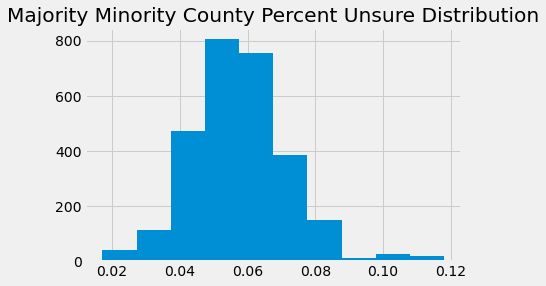

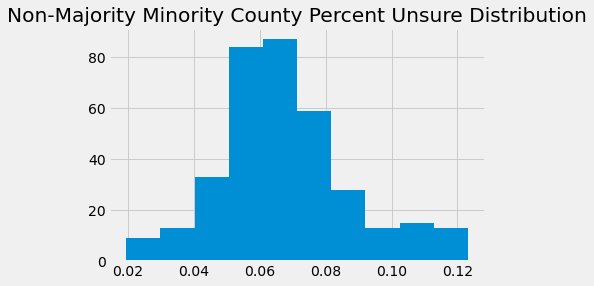

Majority Minority County Sample Size: 2788,
Non-Majority Minority County Sample Size: 354

Majority Minority County Mean: 0.06,
Non-Majority Minority County Mean: 0.07

Majority Minority County Standard Deviation: 0.01,
Non-Majority Minority County Standard Deviation: 0.02

Majority Minority County Variance: 0.0002,
Non-Majority Minority County Variance: 0.0004

P-value for standard t-test: 0.0000,	 P-value for Welch's t-test 0.0000

Majority Minority County Bootstrapped Confidence Interval: (0.05763877331420372, 0.05786915351506457),
Non-Majority Minority County Bootstrapped Confidence Interval: (0.06575960451977401, 0.06587288135593221)

Independent Variable of Interest: Percent Hesitant


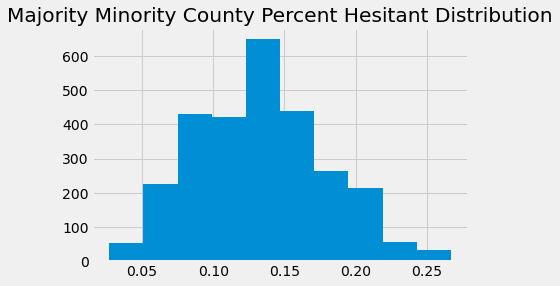

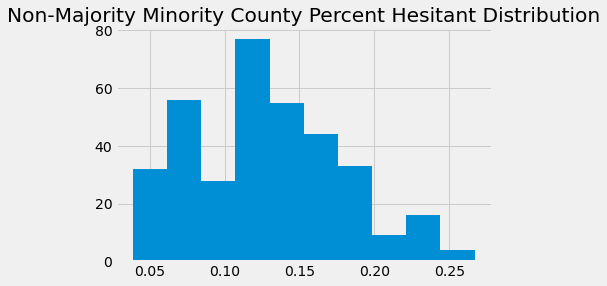

Majority Minority County Sample Size: 2788,
Non-Majority Minority County Sample Size: 354

Majority Minority County Mean: 0.13,
Non-Majority Minority County Mean: 0.13

Majority Minority County Standard Deviation: 0.05,
Non-Majority Minority County Standard Deviation: 0.05

Majority Minority County Variance: 0.0021,
Non-Majority Minority County Variance: 0.0025

P-value for standard t-test: 0.1208,	 P-value for Welch's t-test 0.1470

Majority Minority County Bootstrapped Confidence Interval: (0.13272058823529412, 0.13344766857962698),
Non-Majority Minority County Bootstrapped Confidence Interval: (0.1240638418079096, 0.1254906779661017)

Independent Variable of Interest: Percent Strongly Hesitant


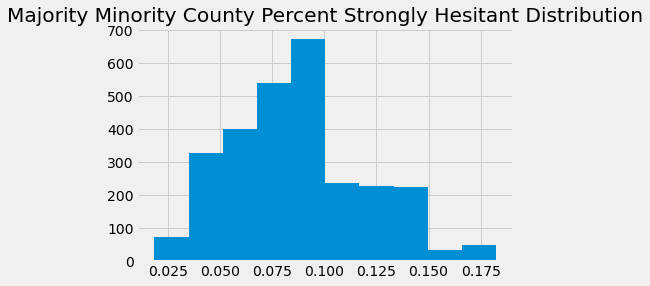

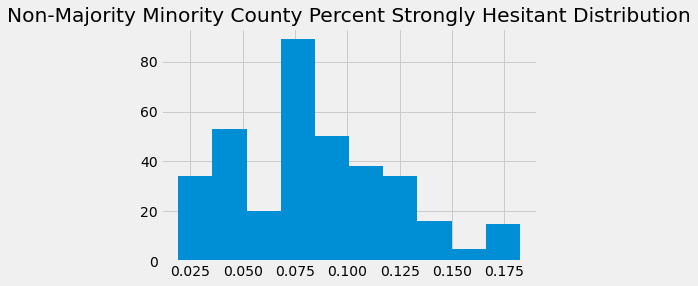

Majority Minority County Sample Size: 2788,
Non-Majority Minority County Sample Size: 354

Majority Minority County Mean: 0.09,
Non-Majority Minority County Mean: 0.09

Majority Minority County Standard Deviation: 0.03,
Non-Majority Minority County Standard Deviation: 0.04

Majority Minority County Variance: 0.0010,
Non-Majority Minority County Variance: 0.0014

P-value for standard t-test: 0.3398,	 P-value for Welch's t-test 0.3955

Majority Minority County Bootstrapped Confidence Interval: (0.0866203012912482, 0.08713823529411764),
Non-Majority Minority County Bootstrapped Confidence Interval: (0.0821409604519774, 0.08237316384180791)



In [82]:
# Select the variables of interest.
column_ind = 'Majority Minority County'
columns_dep = columns_hesitancy

# Group by column values.
X_zero = df.loc[df[column_ind] == 0, columns_dep]
X_one = df.loc[df[column_ind] == 1, columns_dep]

print('Results:\n')

# For each level of hesitancy, compare the means of majority minority and non-minority counties.
for column in columns_dep:
    # Change columns to numpy arrays and perform difference of means test.
    array_zero = pd.Series(X_zero[column]).to_numpy()
    array_one = pd.Series(X_one[column]).to_numpy()
    
    difference_of_means(array_zero, array_one, column, 'Majority Minority County', 'Non-Majority Minority County')


Next we'll test for correlation between the percentage of a population that belongs to a racial minority, and the hesitancy rates within that county.

Variable of Interest: Percent Unsure


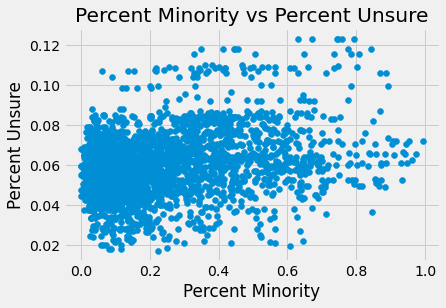

Variable Covariance: 0.00
Pearson's Correlation: 0.31,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: 0.27,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Percent Hesitant


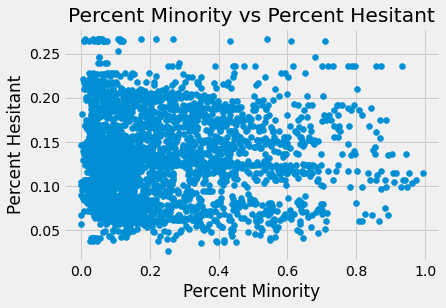

Variable Covariance: -0.00
Pearson's Correlation: -0.00,	 P-value for Lack of Pearson's Correlation: 0.8339
Spearman's Correlation: 0.00,	 P-value for Lack of Spearman's Correlation: 0.9832


Variable of Interest: Percent Strongly Hesitant


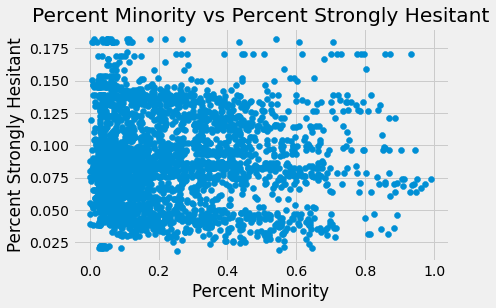

Variable Covariance: 0.00
Pearson's Correlation: 0.02,	 P-value for Lack of Pearson's Correlation: 0.2811
Spearman's Correlation: 0.02,	 P-value for Lack of Spearman's Correlation: 0.2159




In [83]:
# Select minority percentage and hesitancy columns and perform covariance and correlation test.
column_x = 'Percent Minority'
columns_Y = columns_hesitancy

covariance_correlation_tests(column_x, columns_Y)

Before interpreting the results, let's first perform the same test but for each distinct racial group.

Variable of Interest: Percent Hispanic


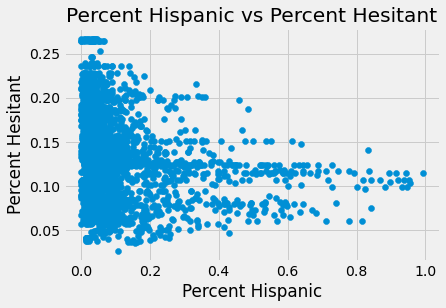

Variable Covariance: -0.00
Pearson's Correlation: -0.21,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: -0.21,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Percent non-Hispanic American Indian/Alaska Native


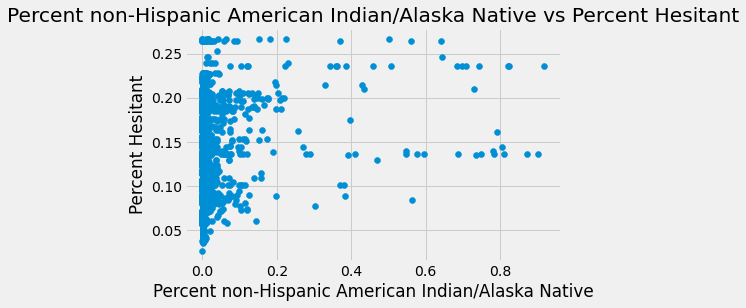

Variable Covariance: 0.00
Pearson's Correlation: 0.17,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: 0.09,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Percent non-Hispanic Asian


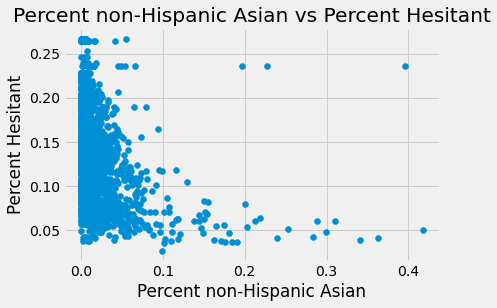

Variable Covariance: -0.00
Pearson's Correlation: -0.27,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: -0.29,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Percent non-Hispanic Black


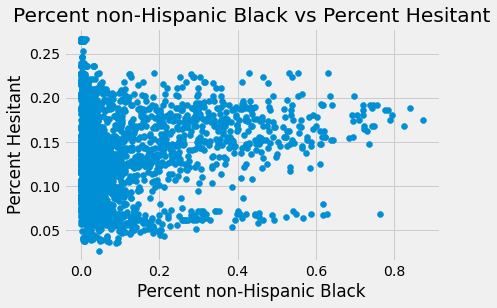

Variable Covariance: 0.00
Pearson's Correlation: 0.16,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: 0.08,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Percent non-Hispanic Native Hawaiian/Pacific Islander


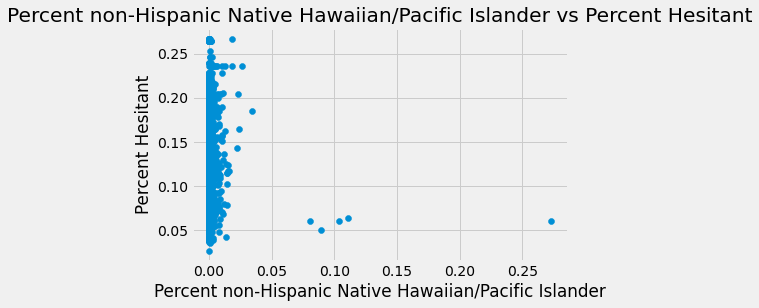

Variable Covariance: -0.00
Pearson's Correlation: -0.05,	 P-value for Lack of Pearson's Correlation: 0.0084
Spearman's Correlation: -0.09,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Percent non-Hispanic White


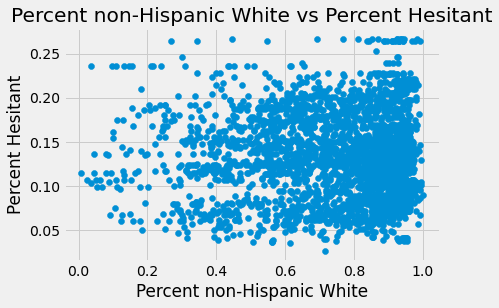

Variable Covariance: 0.00
Pearson's Correlation: 0.00,	 P-value for Lack of Pearson's Correlation: 0.9626
Spearman's Correlation: -0.01,	 P-value for Lack of Spearman's Correlation: 0.6740




In [84]:
# Select racial distribution and hesitancy columns and perform covariance and correlation test.
columns_X = provided_racial_groups
column_y = 'Percent Hesitant'

covariance_correlation_tests(columns_X, column_y)

### Results Summary
Our difference of means tests indicate that there is sufficient evidence to suggest a difference in average percentage unsure between Majority Minority counties and non-Majority Minority counties, but this difference was not observed in the other levels of hesitancy; there was not significant evidence to suggest difference in either average hesitancy percentage or average strongly hesitant percentage between these two groups.

Our correlation and covariance test comparing minority percentage to hesitancy levels tells a similar story, with strong positive correlation being found between minority percentage and percentage unsure, but with no correlation being found with the other two levels of hesitancy.

Looking at each racial group idependently, we find strong negative correlation between percentages of Native Hawaiin/Pacific Islander, Hispanic, and Asian populations and hesitancy level. Contrarily, we see a significant positive correlation between percentage American Indian/Alaskan Native or Black and hesitancy. There is no evidence to suggest a correlation between the percentage of white population and Covid hesitancy.


## Socioeconomical Factors and Vaccine Hesitancy
Next we'll use data from the [US Department of Agriculture, Economic Research Service](https://www.ers.usda.gov/data-products/county-level-data-sets/download-data/), which contains education, income, and unemployment statistics on a county level, and look at the socioeconomic factors that are connected to vaccine hesitancy.

### Education
The USDA dataset contains the percent of each county that has no highschool education, only a highschool education, some college education but no degree, and a college degree. We'll see if these percentages are correlated with vaccine hesitancy.

Variable of Interest: Percent Unsure


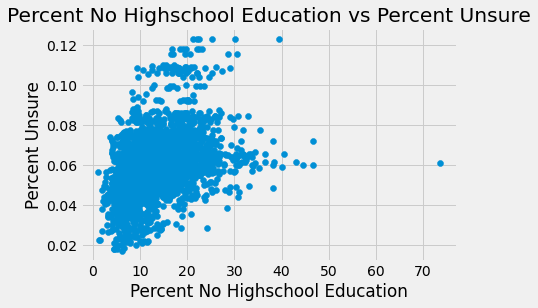

Variable Covariance: 0.04
Pearson's Correlation: 0.42,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: 0.49,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Percent Hesitant


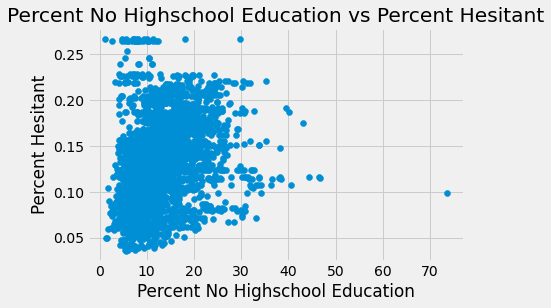

Variable Covariance: 0.07
Pearson's Correlation: 0.25,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: 0.32,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Percent Strongly Hesitant


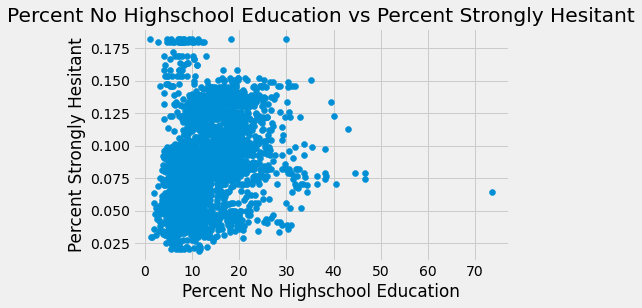

Variable Covariance: 0.06
Pearson's Correlation: 0.27,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: 0.35,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Percent Unsure


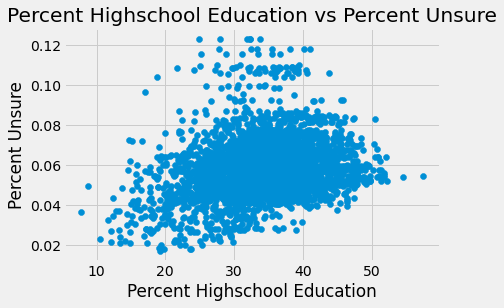

Variable Covariance: 0.03
Pearson's Correlation: 0.25,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: 0.26,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Percent Hesitant


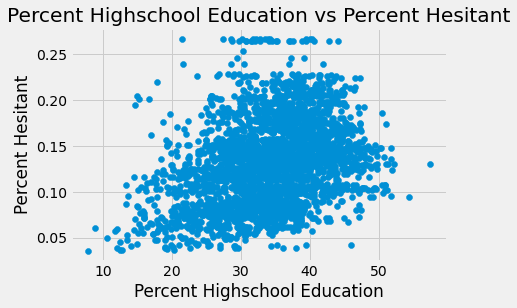

Variable Covariance: 0.11
Pearson's Correlation: 0.33,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: 0.34,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Percent Strongly Hesitant


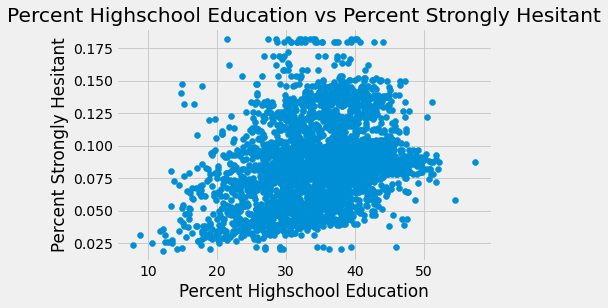

Variable Covariance: 0.07
Pearson's Correlation: 0.30,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: 0.32,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Percent Unsure


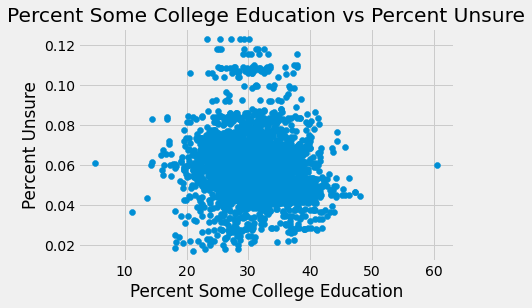

Variable Covariance: -0.01
Pearson's Correlation: -0.11,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: -0.15,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Percent Hesitant


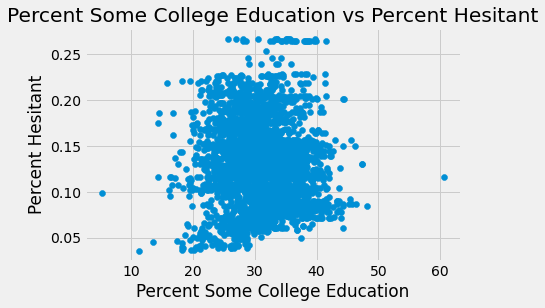

Variable Covariance: -0.01
Pearson's Correlation: -0.05,	 P-value for Lack of Pearson's Correlation: 0.0060
Spearman's Correlation: -0.09,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Percent Strongly Hesitant


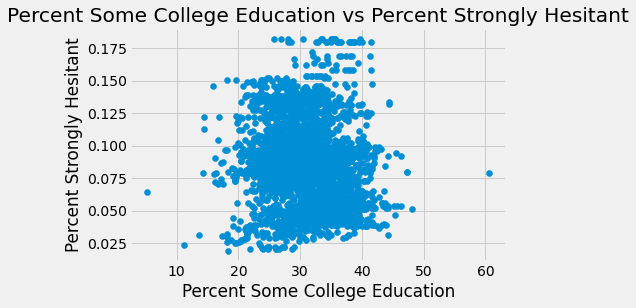

Variable Covariance: -0.01
Pearson's Correlation: -0.07,	 P-value for Lack of Pearson's Correlation: 0.0003
Spearman's Correlation: -0.10,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Percent Unsure


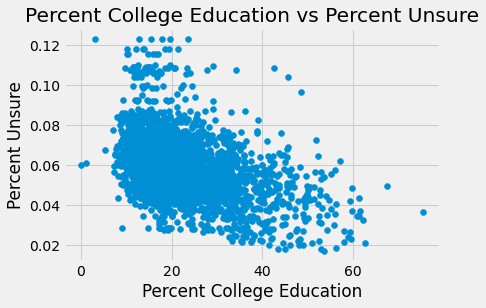

Variable Covariance: -0.06
Pearson's Correlation: -0.41,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: -0.42,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Percent Hesitant


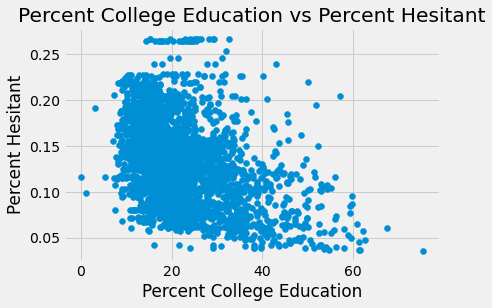

Variable Covariance: -0.17
Pearson's Correlation: -0.39,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: -0.39,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Percent Strongly Hesitant


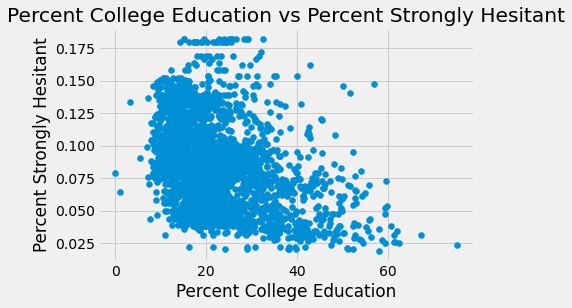

Variable Covariance: -0.11
Pearson's Correlation: -0.38,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: -0.39,	 P-value for Lack of Spearman's Correlation: 0.0000




In [85]:
# Select education and hesitancy columns and perform covariance and correlation tests.
columns_X = columns_education
columns_Y = columns_hesitancy

for col in columns_X:
    covariance_correlation_tests(col, columns_Y)


### Income
The USDA dataset also contains median household income by county, which we will test for correlation with hesitancy and deaths rates.

Variable of Interest: Percent Unsure


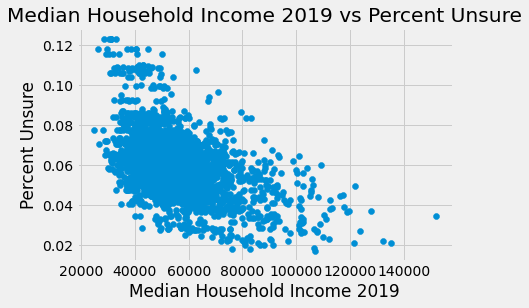

Variable Covariance: -105.45
Pearson's Correlation: -0.48,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: -0.47,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Percent Hesitant


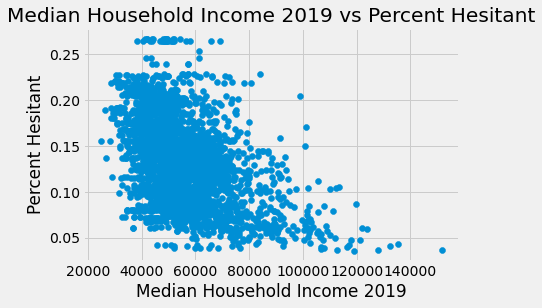

Variable Covariance: -283.73
Pearson's Correlation: -0.44,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: -0.43,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Percent Strongly Hesitant


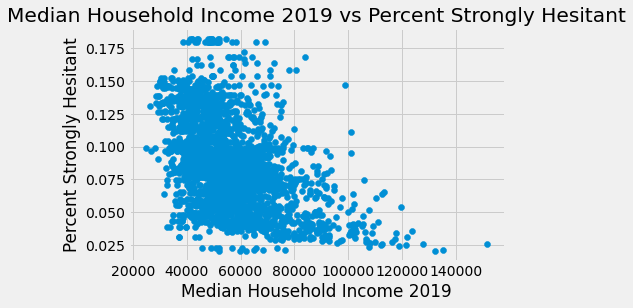

Variable Covariance: -204.54
Pearson's Correlation: -0.45,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: -0.45,	 P-value for Lack of Spearman's Correlation: 0.0000




In [86]:
# Select income and hesitancy columns and perform covariance and correlation test.
column_x = 'Median Household Income 2019'
columns_Y = columns_hesitancy

covariance_correlation_tests(column_x, columns_Y)


Variable of Interest: Deaths Per Case (1/1/21)


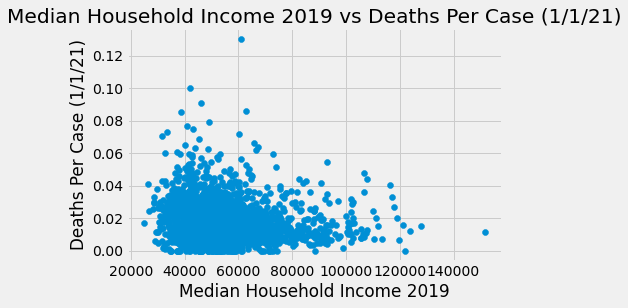

Variable Covariance: -24.15
Pearson's Correlation: -0.15,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: -0.20,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Deaths Per Case (6/10/21)


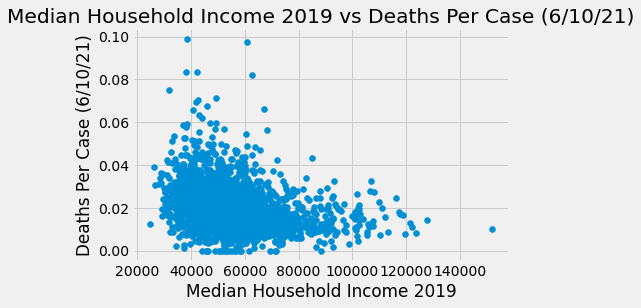

Variable Covariance: -42.18
Pearson's Correlation: -0.30,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: -0.36,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Deaths Per Case (2/25/22)


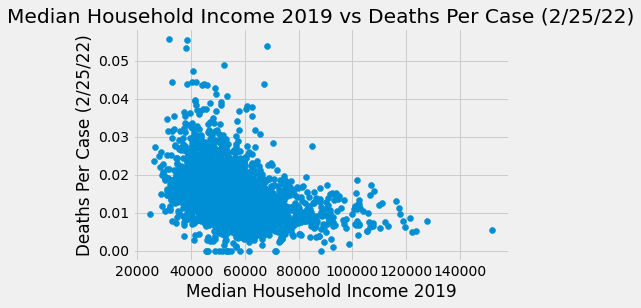

Variable Covariance: -36.18
Pearson's Correlation: -0.38,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: -0.44,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Deaths Per Case (1/1/21)


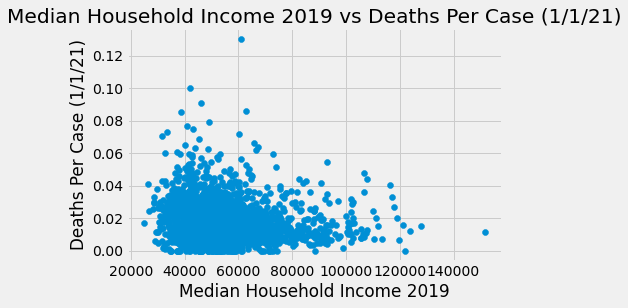

Variable Covariance: -24.15
Pearson's Correlation: -0.15,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: -0.20,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Deaths Per Case (6/10/21)


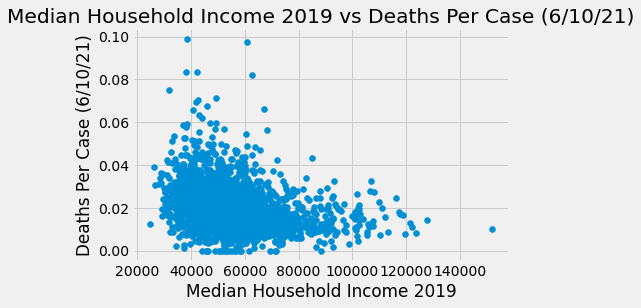

Variable Covariance: -42.18
Pearson's Correlation: -0.30,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: -0.36,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Deaths Per Case (2/25/22)


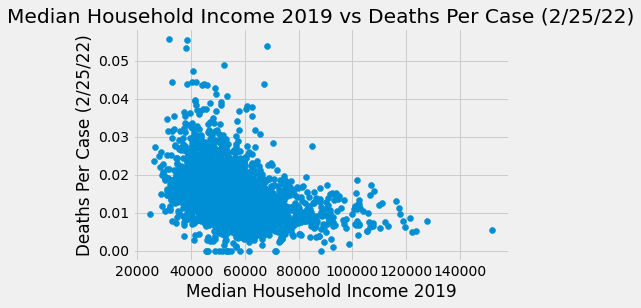

Variable Covariance: -36.18
Pearson's Correlation: -0.38,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: -0.44,	 P-value for Lack of Spearman's Correlation: 0.0000




In [87]:
# Select income and death rate columns and perform covariance and correlation test.
column_x = 'Median Household Income 2019'

covariance_correlation_tests(column_x, columns_per_capita_deaths)
covariance_correlation_tests(column_x, columns_per_case)


### Unemployment
The USDA dataset contains unemployment rate by county, which we will also compare to both hesitancy and death rates.

Variable of Interest: Percent Unsure


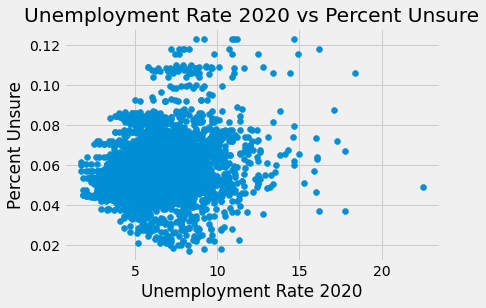

Variable Covariance: 0.01
Pearson's Correlation: 0.20,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: 0.19,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Percent Hesitant


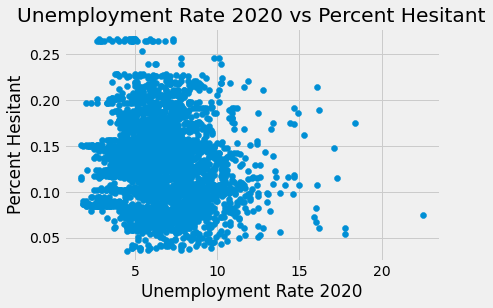

Variable Covariance: -0.01
Pearson's Correlation: -0.12,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: -0.13,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Percent Strongly Hesitant


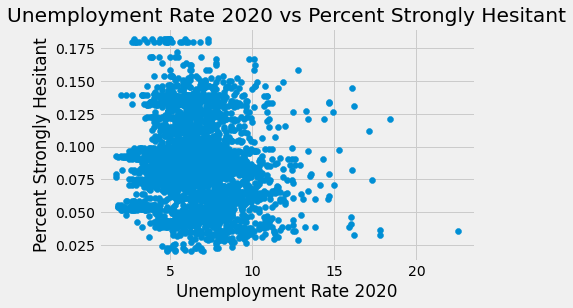

Variable Covariance: -0.01
Pearson's Correlation: -0.10,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: -0.10,	 P-value for Lack of Spearman's Correlation: 0.0000




In [88]:
# Select unemployment and hesitancy columns and perform covariance and correlation test.
column_x = 'Unemployment Rate 2020'
columns_Y = columns_hesitancy

covariance_correlation_tests(column_x, columns_Y)


Variable of Interest: Deaths Per Case (1/1/21)


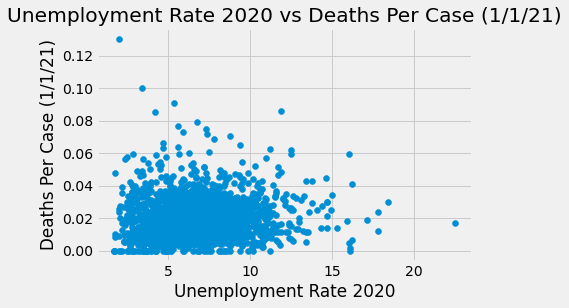

Variable Covariance: 0.00
Pearson's Correlation: 0.12,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: 0.16,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Deaths Per Case (6/10/21)


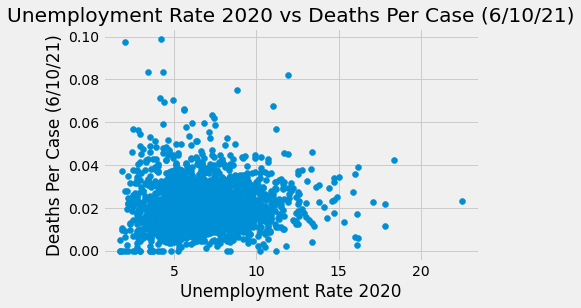

Variable Covariance: 0.00
Pearson's Correlation: 0.06,	 P-value for Lack of Pearson's Correlation: 0.0010
Spearman's Correlation: 0.10,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Deaths Per Case (2/25/22)


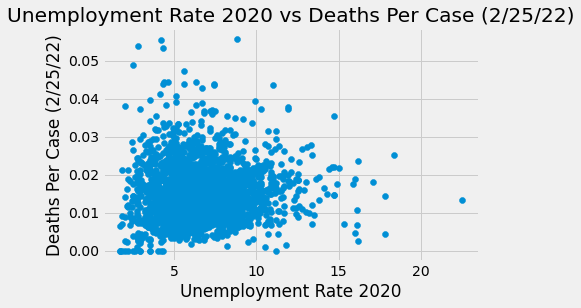

Variable Covariance: 0.00
Pearson's Correlation: 0.06,	 P-value for Lack of Pearson's Correlation: 0.0037
Spearman's Correlation: 0.07,	 P-value for Lack of Spearman's Correlation: 0.0002


Variable of Interest: Deaths Per Case (1/1/21)


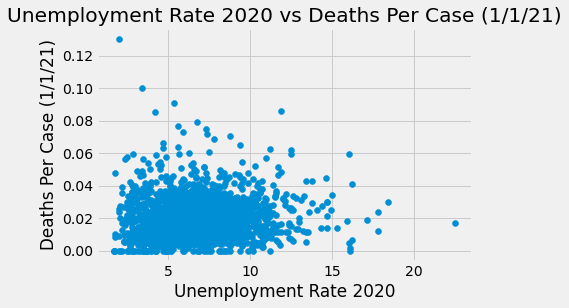

Variable Covariance: 0.00
Pearson's Correlation: 0.12,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: 0.16,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Deaths Per Case (6/10/21)


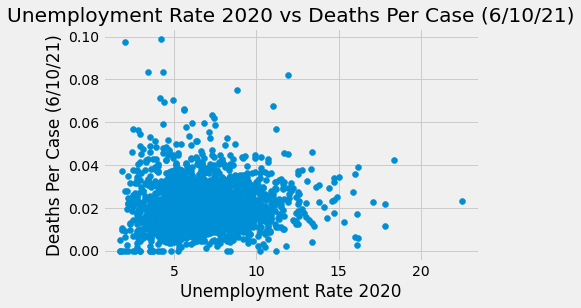

Variable Covariance: 0.00
Pearson's Correlation: 0.06,	 P-value for Lack of Pearson's Correlation: 0.0010
Spearman's Correlation: 0.10,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Deaths Per Case (2/25/22)


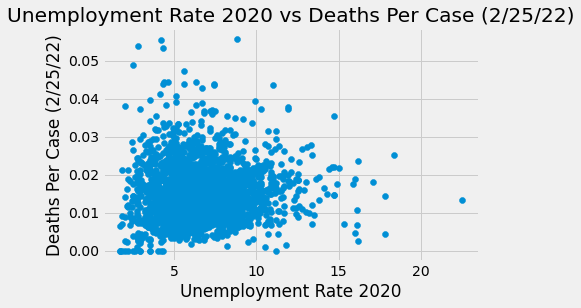

Variable Covariance: 0.00
Pearson's Correlation: 0.06,	 P-value for Lack of Pearson's Correlation: 0.0037
Spearman's Correlation: 0.07,	 P-value for Lack of Spearman's Correlation: 0.0002




In [89]:
# Select unemployment and death rate columns and perform covariance and correlation test.
column_x = 'Unemployment Rate 2020'

covariance_correlation_tests(column_x, columns_per_capita_deaths)
covariance_correlation_tests(column_x, columns_per_case)


### Results Summary
Admittedly, these results can be fairly overwhelming, as every hypothesis test performed rejected our null hypothesis. In order to understand these results, we must look at the strength of our correlations, as well as the qualitative characteristics of their scatterplots in order to get a nuanced understanding of the results.

We see that Covid hesitancy tends to be higher in communities with higher percentages of individuals with only highschool educations or below. Additionally, Covid hesitancy tends to be lower in communities with higher percentages of college educated individuals.

The strongest correlation found so far is that between median household income and hesitancy. The smallest magnitude Pearson's correlation between MHI and a hesitancy level was -0.44, while the largest magnitude was -0.52. There was also a strong negative correlation between MHI and deaths per case, a disparity that only increased as the pandemic progressed. Unemployment rates are also significantly correlated with both hesitancy and death rates, but these correlations were less drastic than those associated with income.


## Covid Vaccine Hesitancy and Case/Death Rates
For many the primary concern with Covid vaccine hesitancy is that it will result in more Covid cases and therefore deaths from Covid. We'll use Covid cases and death information from the [COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19) and see if there is a correlation between vaccine hesitancy and cases/deaths per capita for a county.


Variable of Interest: Cases Per Capita (1/22/20)


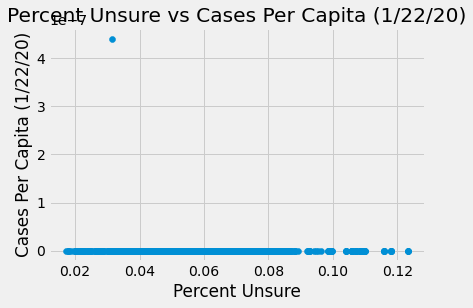

Variable Covariance: -0.00
Pearson's Correlation: -0.03,	 P-value for Lack of Pearson's Correlation: 0.0767
Spearman's Correlation: -0.03,	 P-value for Lack of Spearman's Correlation: 0.1043


Variable of Interest: Cases Per Capita (1/1/21)


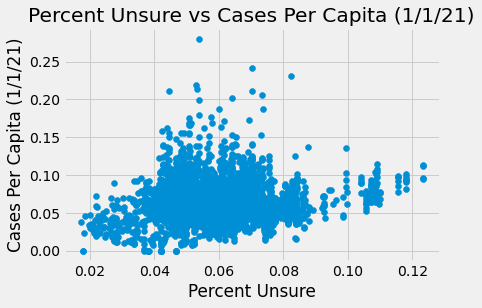

Variable Covariance: 0.00
Pearson's Correlation: 0.15,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: 0.10,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Cases Per Capita (6/10/21)


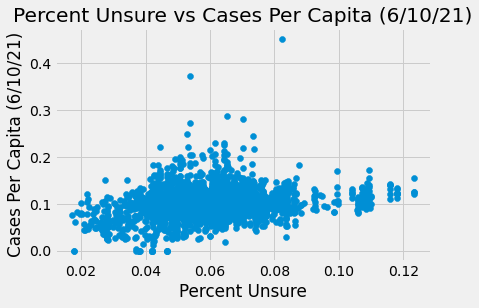

Variable Covariance: 0.00
Pearson's Correlation: 0.22,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: 0.18,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Cases Per Capita (2/25/22)


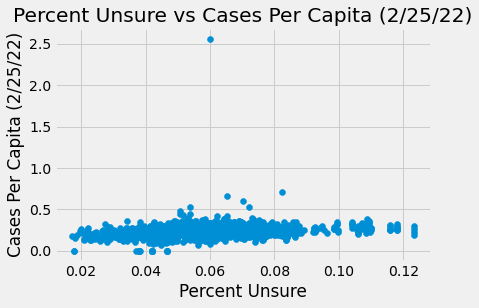

Variable Covariance: 0.00
Pearson's Correlation: 0.20,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: 0.22,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Deaths Per Case (1/1/21)


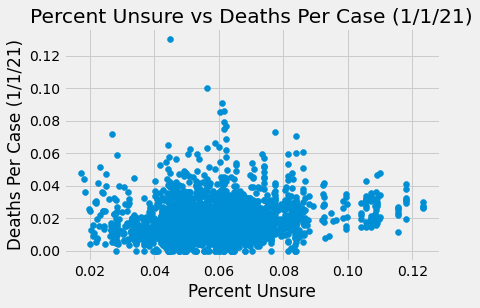

Variable Covariance: 0.00
Pearson's Correlation: 0.15,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: 0.17,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Deaths Per Case (6/10/21)


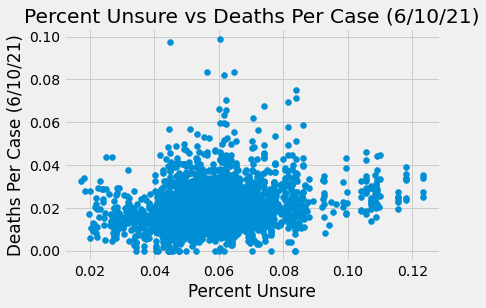

Variable Covariance: 0.00
Pearson's Correlation: 0.24,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: 0.26,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Deaths Per Case (2/25/22)


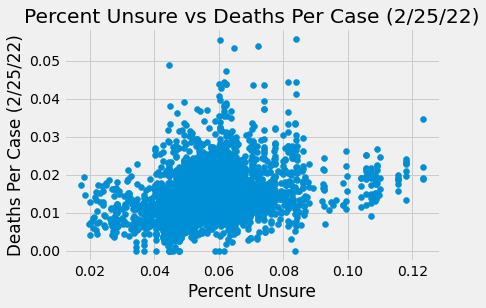

Variable Covariance: 0.00
Pearson's Correlation: 0.28,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: 0.32,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Cases Per Capita (1/22/20)


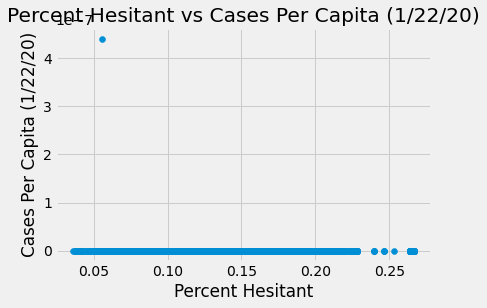

Variable Covariance: -0.00
Pearson's Correlation: -0.03,	 P-value for Lack of Pearson's Correlation: 0.0886
Spearman's Correlation: -0.03,	 P-value for Lack of Spearman's Correlation: 0.1000


Variable of Interest: Cases Per Capita (1/1/21)


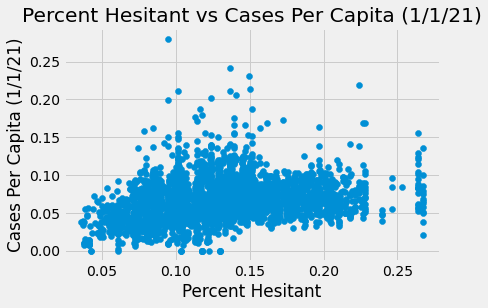

Variable Covariance: 0.00
Pearson's Correlation: 0.25,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: 0.29,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Cases Per Capita (6/10/21)


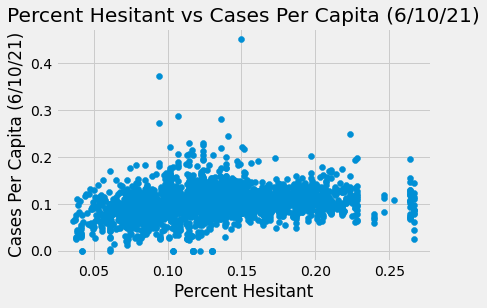

Variable Covariance: 0.00
Pearson's Correlation: 0.23,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: 0.25,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Cases Per Capita (2/25/22)


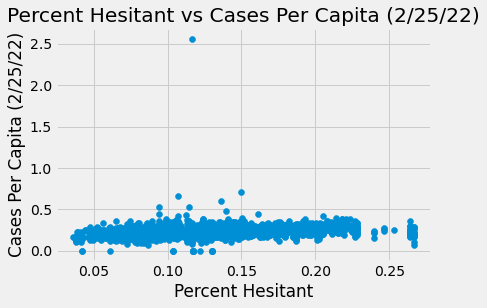

Variable Covariance: 0.00
Pearson's Correlation: 0.22,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: 0.32,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Deaths Per Case (1/1/21)


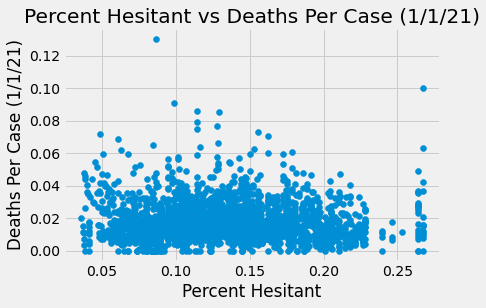

Variable Covariance: -0.00
Pearson's Correlation: -0.03,	 P-value for Lack of Pearson's Correlation: 0.1307
Spearman's Correlation: -0.02,	 P-value for Lack of Spearman's Correlation: 0.3946


Variable of Interest: Deaths Per Case (6/10/21)


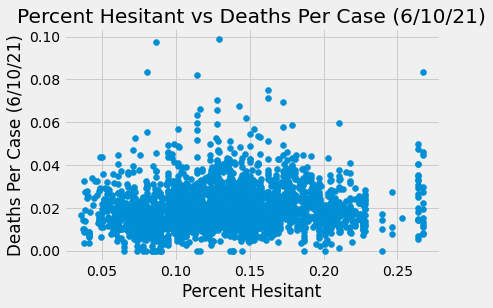

Variable Covariance: 0.00
Pearson's Correlation: 0.13,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: 0.16,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Deaths Per Case (2/25/22)


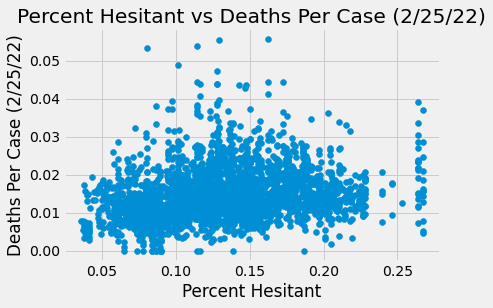

Variable Covariance: 0.00
Pearson's Correlation: 0.23,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: 0.28,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Cases Per Capita (1/22/20)


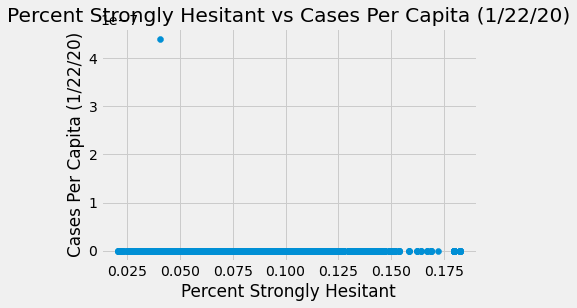

Variable Covariance: -0.00
Pearson's Correlation: -0.03,	 P-value for Lack of Pearson's Correlation: 0.1517
Spearman's Correlation: -0.03,	 P-value for Lack of Spearman's Correlation: 0.1294


Variable of Interest: Cases Per Capita (1/1/21)


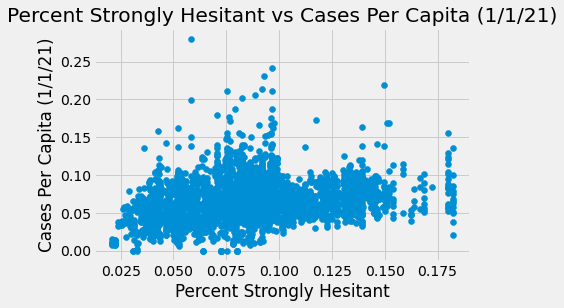

Variable Covariance: 0.00
Pearson's Correlation: 0.22,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: 0.24,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Cases Per Capita (6/10/21)


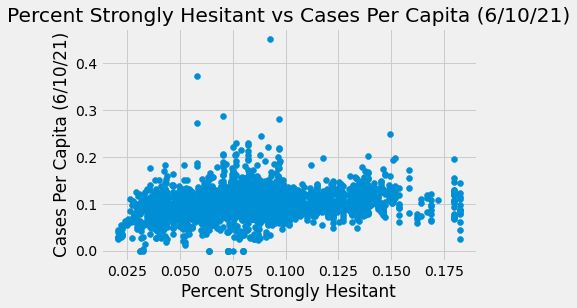

Variable Covariance: 0.00
Pearson's Correlation: 0.21,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: 0.23,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Cases Per Capita (2/25/22)


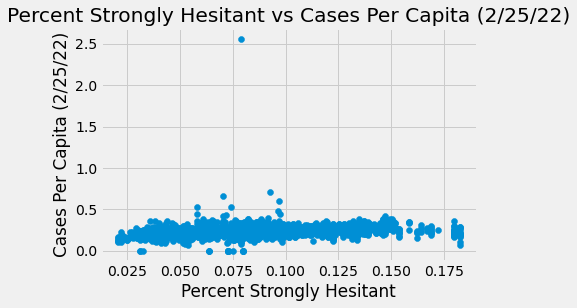

Variable Covariance: 0.00
Pearson's Correlation: 0.21,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: 0.31,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Deaths Per Case (1/1/21)


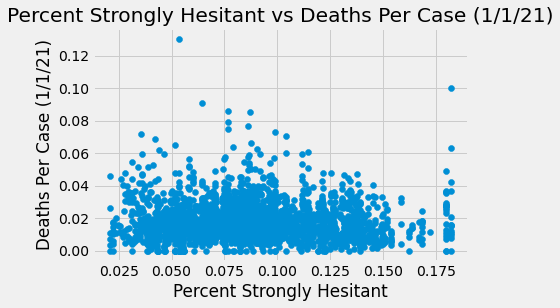

Variable Covariance: -0.00
Pearson's Correlation: -0.02,	 P-value for Lack of Pearson's Correlation: 0.2675
Spearman's Correlation: -0.01,	 P-value for Lack of Spearman's Correlation: 0.5388


Variable of Interest: Deaths Per Case (6/10/21)


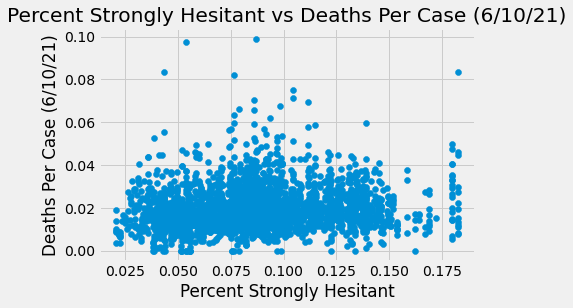

Variable Covariance: 0.00
Pearson's Correlation: 0.14,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: 0.16,	 P-value for Lack of Spearman's Correlation: 0.0000


Variable of Interest: Deaths Per Case (2/25/22)


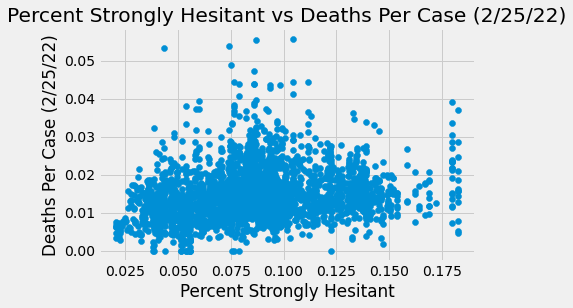

Variable Covariance: 0.00
Pearson's Correlation: 0.22,	 P-value for Lack of Pearson's Correlation: 0.0000
Spearman's Correlation: 0.27,	 P-value for Lack of Spearman's Correlation: 0.0000




In [90]:
# Select hesitancy and death rate columns and perform covariance and correlation test.
columns_X = columns_hesitancy

for col in columns_X:
    covariance_correlation_tests(col, columns_per_capita_cases)
    covariance_correlation_tests(col, columns_per_capita_deaths)


### Results Summary
Unfortunately, all levels of Covid hesitancy from unsure to strongly hesitant are strongly positively correlated with both Covid case and death rates. Interestingly, this correlation also existed on January 1, 2021, which was before the date of our survey.

Note: We can see that there is a pretty drastic outlier in per capita cases as of February 2022. Loving County is responsbile for this outlier, and its story is actually very interesting. This incredibly small county was the last in the contiguous United States to have a positive Covid case, but eventually did have an outbreak that resulted in the outlier we can see in the above figures.

## Conclusion (TL;DR)
### Racial Demographics and Hesitancy
We can see that while vaccine hesitancy in general is not significantly different between primarily non-minority to primarily minority counties, having a status of "unsure' was higher among primarily minority counties.
We can also see that population minority percentage does not have a simple correlation with hesitancy - it looks like there's a more nuanced relationship. This motivates us to look more closely into each individual racial group and look into its correlation with hesitancy.

Looking at each racial group separately shows more clear patterns. We see that all but one racial group is significantly correlated with hesitancy, some negatively and some positively. Specifically, Covid hesitancy tends to be lower in counties with higher percentages of Native Hawaiin/Pacific Islander, Hispanic, and Asian populations. There are also positive correlations between percentage of American Indian/Alaskan Native or Black populations and vaccine hestiancy, but these correlations are not quite as strong. There is no evidence to suggest a correlation between the percentage of white population and Covid hesitancy.

### Socioeconomic Factors and Hesitancy
We see that Covid hesitancy tends to be higher in communities with higher percentages of individuals with only highschool educations or below. Additionally, Covid hesitancy tends to be lower in communities with higher percentages of college educated individuals.

The strongest correlation found so far is that between median household income and hesitancy. The smallest magnitude Pearson's correlation between MHI and a hesitancy level was -0.44, while the largest magnitude was -0.52. There was also a strong negative correlation between MHI and deaths per case, a disparity that only increased as the pandemic progressed. Unemployment rates are also significantly correlated with both hesitancy and death rates, but these correlations were less drastic than those associated with income.

### Hesitancy and Case/Death Rates
Unfortunately, all levels of Covid hesitancy from unsure to strongly hesitant are strongly positively correlated with both Covid case and death rates. Interestingly, this correlation also existed on January 1, 2021, which was before the date of our survey.

Note: We can see that there is a pretty drastic outlier in per capita cases as of February 2022. Loving County is responsbile for this outlier, and its story is actually very interesting. This incredibly small county was the last in the contiguous United States to have a positive Covid case, but eventually did have an outbreak that resulted in the outlier we can see in the above figures.

### Correlation, Causation, and Takeaway
The depth of this investigation was admittedly shallow, only looking at differences in means and linear/monotonic correlations. However, we can confidently conclude the following: Many of the same demographic and socioecomic factors that have historically influenced American's beliefs are also influencing communities' hesitancy towards Covid vaccination. Moreover, it is important to undertand why these differences exist, as these differences are also influencing the local severity of the Covid pandemic both in terms of cases and deaths.
